In [33]:
from google.colab import drive
drive.mount('/content/drive')

BASE = "/content/drive/MyDrive/cci_project"   # change if you used a different folder
INPUT = BASE + "/data/input"
OUTPUT = BASE + "/data/output"
import os
os.makedirs(INPUT, exist_ok=True)
os.makedirs(OUTPUT, exist_ok=True)
print("BASE:", BASE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
BASE: /content/drive/MyDrive/cci_project


In [34]:
import os

print("Files inside INPUT:")
print(os.listdir(INPUT))

Files inside INPUT:
['cleaned_bus.csv.csv']


In [35]:
df = pd.read_csv("cleaned_bus.csv.csv")   # <-- put the correct raw filename here

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_bus.csv.csv'

In [31]:
import pandas as pd
import re

# Load your original file
df = pd.read_csv("cleaned_bus.csv.csv")   # change filename if needed

# --- 1) Clean Travel Duration (e.g., "6h 30m" → 390 minutes) ---
def parse_duration(x):
    if pd.isna(x):
        return None
    hours = re.search(r'(\d+)h', str(x))
    mins = re.search(r'(\d+)m', str(x))
    total_mins = 0
    if hours:
        total_mins += int(hours.group(1)) * 60
    if mins:
        total_mins += int(mins.group(1))
    return total_mins

df["travel_duration_minutes"] = df["Travel Duration"].apply(parse_duration)

# --- 2) Clean Price (remove symbols, commas, convert to int) ---
df["price"] = df["price"].replace(r'[^\d.]', '', regex=True)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# --- 3) Clean Rating (convert to float) ---
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# --- 4) Clean Seats Left & Window Seats ---
df["Seats Left"] = pd.to_numeric(df["Seats Left"], errors="coerce")
df["Window Seats"] = pd.to_numeric(df["Window Seats"], errors="coerce")

# --- 5) Ensure categorical columns are string ---
categorical_cols = ["Operator", "Bus Type", "Source", "Destination"]
for col in categorical_cols:
    df[col] = df[col].astype(str)

# --- Save cleaned file ---
df.to_csv("cleaned_bus_data.csv", index=False)

print("✅ Cleaned dataset saved as cleaned_bus_data.csv")
print(df.dtypes.head(20))

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_bus.csv.csv'

In [ ]:
file_name = "cleaned_bus.csv.csv"   # change this to your actual CSV name
df_raw = pd.read_csv(os.path.join(INPUT, file_name), encoding='utf-8', low_memory=False)

print("Rows, Cols:", df_raw.shape)
df_raw.head(5)

Rows, Cols: (4988, 13)


,Unnamed: 0,Operator,Departure Time,Travel Duration,Arrival Time,price,Bus Type,Seats Left,Window Seats,rating,Source,Destination,distance
0,0,Laxmi holidays,2024-11-07 04:00:00,02hrs 45mins,2024-11-07 06:45:00,1330,Bharat Benz A/C Sleeper (2+1),16,9,5.0,Agra,Delhi,240
1,1,Tiwari Tour and Travels,2024-11-07 02:06:00,03hrs 40mins,2024-11-07 05:46:00,2499,A/C Sleeper (2+1),26,11,5.0,Agra,Delhi,240
2,3,IntrCity SmartBus,2024-11-07 03:45:00,03hrs 25mins,2024-11-07 07:10:00,1489,A/C Semi Sleeper / Sleeper (2+1),13,9,5.0,Agra,Delhi,240
3,4,NueGo,2024-11-07 21:00:00,04hrs 45mins,2024-11-07 01:45:00,474,Electric A/C Seater (2+2),44,20,4.4,Agra,Delhi,240
4,6,IntrCity SmartBus,2024-11-07 01:15:00,02hrs 25mins,2024-11-07 03:40:00,1619,A/C Seater / Sleeper (2+1),10,4,5.0,Agra,Delhi,240


In [ ]:
import pandas as pd
import numpy as np

# Load your CSV (replace with actual filename if different)
file_name = "cleaned_bus.csv.csv"
df = pd.read_csv(os.path.join(INPUT, file_name), encoding="utf-8", low_memory=False)

# Step 1: Quick look
print("Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nNull Counts:")
print(df.isnull().sum())

# Step 2: Drop duplicates
df.drop_duplicates(inplace=True)

# Step 3: Clean 'price' → remove ₹ or commas, convert to numeric
df['price'] = df['price'].replace('[^0-9]', '', regex=True).astype(float)

# Step 4: Convert 'Travel Duration' → total minutes
def duration_to_minutes(x):
    try:
        parts = x.lower().replace("hrs", "h").replace("hr", "h").replace("mins","m").replace("min","m").split()
        hours, mins = 0, 0
        for p in parts:
            if "h" in p: hours = int(p.replace("h",""))
            if "m" in p: mins = int(p.replace("m",""))
        return hours*60 + mins
    except:
        return np.nan

df['travel_minutes'] = df['Travel Duration'].astype(str).apply(duration_to_minutes)

# Step 5: Clean ratings
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 6: Standardize Operator/Bus Type text
df['Operator'] = df['Operator'].str.strip().str.title()
df['Bus Type'] = df['Bus Type'].str.strip().str.title()

print("\nCleaned Preview:")
df.head(5)

Shape: (4988, 13)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4988 non-null   int64  
 1   Operator         4988 non-null   object 
 2   Departure Time   4988 non-null   object 
 3   Travel Duration  4988 non-null   object 
 4   Arrival Time     4988 non-null   object 
 5   price            4988 non-null   int64  
 6   Bus Type         4988 non-null   object 
 7   Seats Left       4988 non-null   int64  
 8   Window Seats     4988 non-null   int64  
 9   rating           4988 non-null   float64
 10  Source           4988 non-null   object 
 11  Destination      4988 non-null   object 
 12  distance         4988 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 506.7+ KB
None

Null Counts:
Unnamed: 0         0
Operator           0
Departure Time     0
Travel Duration    0
Arri

,Unnamed: 0,Operator,Departure Time,Travel Duration,Arrival Time,price,Bus Type,Seats Left,Window Seats,rating,Source,Destination,distance,travel_minutes
0,0,Laxmi Holidays,2024-11-07 04:00:00,02hrs 45mins,2024-11-07 06:45:00,1330.0,Bharat Benz A/C Sleeper (2+1),16,9,5.0,Agra,Delhi,240,165
1,1,Tiwari Tour And Travels,2024-11-07 02:06:00,03hrs 40mins,2024-11-07 05:46:00,2499.0,A/C Sleeper (2+1),26,11,5.0,Agra,Delhi,240,220
2,3,Intrcity Smartbus,2024-11-07 03:45:00,03hrs 25mins,2024-11-07 07:10:00,1489.0,A/C Semi Sleeper / Sleeper (2+1),13,9,5.0,Agra,Delhi,240,205
3,4,Nuego,2024-11-07 21:00:00,04hrs 45mins,2024-11-07 01:45:00,474.0,Electric A/C Seater (2+2),44,20,4.4,Agra,Delhi,240,285
4,6,Intrcity Smartbus,2024-11-07 01:15:00,02hrs 25mins,2024-11-07 03:40:00,1619.0,A/C Seater / Sleeper (2+1),10,4,5.0,Agra,Delhi,240,145


In [ ]:
avg_price_route = (
    df.groupby(["Source", "Destination"])["price"]
      .mean()
      .reset_index()
      .sort_values("price", ascending=False)
)

print("Top 10 most expensive routes (by avg price):")
print(avg_price_route.head(10))

Top 10 most expensive routes (by avg price):
            Source Destination        price
16         Chennai      Mumbai  8274.750000
68  Vishakhapatnam     Kolkata  5000.000000
20           Delhi      Mumbai  4300.000000
50          Mumbai       Delhi  4137.500000
49          Mumbai     Chennai  3832.333333
32          Jaipur      Mumbai  3637.375000
33          Jaipur        Pune  3591.666667
27       Hyderabad     Kolkata  3000.000000
36          Kanpur     Lucknow  2469.277778
21             Goa   Hyderabad  2275.300000


In [ ]:
print("Top 10 cheapest routes:")
print(avg_price_route.tail(10))

Top 10 cheapest routes:
         Source         Destination       price
43      Kolkata            Varanasi  899.000000
11  Bhubaneswar             Kolkata  842.620690
31       Jaipur               Delhi  839.934307
18        Delhi              Jaipur  714.066265
53        Patna             Kolkata  700.000000
40        Kochi  Thiruvananthapuram  688.600000
13      Chennai           Bengaluru  657.215827
7     Bengaluru             Chennai  632.289855
65     Varanasi               Patna  612.000000
54        Patna            Varanasi  540.000000


In [ ]:
df['cost_per_km'] = df['price'] / df['distance']

avg_cost_per_km = (
    df.groupby(["Source", "Destination"])["cost_per_km"]
      .mean()
      .reset_index()
      .sort_values("cost_per_km", ascending=False)
)

print("Top 10 routes with highest cost per km:")
print(avg_cost_per_km.head(10))

print("\nTop 10 routes with lowest cost per km:")
print(avg_cost_per_km.tail(10))

Top 10 routes with highest cost per km:
            Source Destination  cost_per_km
36          Kanpur     Lucknow    21.471981
46         Lucknow      Kanpur    15.216037
57            Pune      Mumbai     9.378633
52          Mumbai        Pune     7.771613
16         Chennai      Mumbai     6.198315
68  Vishakhapatnam     Kolkata     5.668934
58         Udaipur   Ahmedabad     4.899235
0             Agra       Delhi     4.858083
62        Varanasi      Kanpur     4.817494
6        Ahmedabad     Udaipur     4.641421

Top 10 routes with lowest cost per km:
         Source Destination  cost_per_km
39        Kochi     Chennai     2.003382
9     Bengaluru   Hyderabad     1.998875
11  Bhubaneswar     Kolkata     1.906382
13      Chennai   Bengaluru     1.904973
15      Chennai       Kochi     1.879481
7     Bengaluru     Chennai     1.827427
25    Hyderabad     Chennai     1.792265
14      Chennai   Hyderabad     1.725055
43      Kolkata    Varanasi     1.322059
53        Patna     Kolkat

In [ ]:
operator_stats = (
    df.groupby("Operator")[["price", "rating"]]
      .mean()
      .reset_index()
      .sort_values("price", ascending=False)
)

print("Top 10 Operators by Avg Price:")
print(operator_stats.head(10))

print("\nTop 10 Operators by Avg Rating:")
print(operator_stats.sort_values("rating", ascending=False).head(10))

Top 10 Operators by Avg Price:
                               Operator         price  rating
41                Anmol Tours & Travels  12127.500000    2.30
423                Mj Bhati Travels Jjn   6934.714286    1.60
24                        Alpha Travels   6000.000000    1.40
696  Shivrameshwar Bane Tours & Travels   5000.000000    3.20
597        Rajdhani Travels Corporation   5000.000000    4.20
270                 Jai Bajrang Travels   5000.000000    2.30
889               Vlr Tours And Travels   5000.000000    2.30
64                        Atmaram Gobus   4819.000000    3.62
195                     Ganga   Travels   4762.000000    3.20
414                     Meghana Travels   4750.000000    2.80

Top 10 Operators by Avg Rating:
                         Operator   price  rating
683    Shatabdi Travels Gorakhpur  1100.0     5.0
25                 Amaals Travels  1140.0     5.0
843       Tiwari Tour And Travels  2499.0     5.0
153     Dolphin Travel House (17)   910.0     5.0
612 

In [ ]:
bus_type_stats = (
    df.groupby("Bus Type")[["price", "rating"]]
      .mean()
      .reset_index()
      .sort_values("price", ascending=False)
)

print("Bus Type Price vs Rating:")
print(bus_type_stats)

Bus Type Price vs Rating:
                                         Bus Type        price    rating
74  Volvo Multi Axle B11R Ac Seater\Sleeper (2+1)  3099.500000  3.400000
76            Volvo Multi Axle Sleeper B11R (2+1)  3078.200000  2.920000
37                           Non A/C Seater (2+2)  2184.250000  2.375000
72                   Volvo Ac Seater Pushback 2+2  2133.333333  2.333333
40                 Non A/C Seater / Sleeper (2+2)  2131.866667  2.066667
..                                            ...          ...       ...
33         Mercedes Multi-Axle Semi Sleeper (2+2)   349.000000  3.233333
28                      Electric A/C Seater (2+2)   348.142857  4.008571
36                         Non A/C Seater (1+1+1)   300.000000  4.100000
50                            Non Ac Seater (2+3)   299.000000  2.000000
38                           Non A/C Seater (2+3)   290.000000  1.833333

[86 rows x 3 columns]


In [ ]:
duration_price = (
    df.groupby("travel_minutes")["price"]
      .mean()
      .reset_index()
      .sort_values("travel_minutes")
)

print("Duration vs Price (first 15 rows):")
print(duration_price.head(15))

Duration vs Price (first 15 rows):
    travel_minutes         price
0               55   1749.500000
1               59   1699.000000
2               60   2770.000000
3               70   1000.000000
4               75   1627.500000
5               80    899.000000
6               85   1299.000000
7               90  13999.000000
8               95   1600.000000
9              100    600.000000
10             104    952.000000
11             105   1156.166667
12             110   1032.000000
13             115   1950.000000
14             120   1789.666667


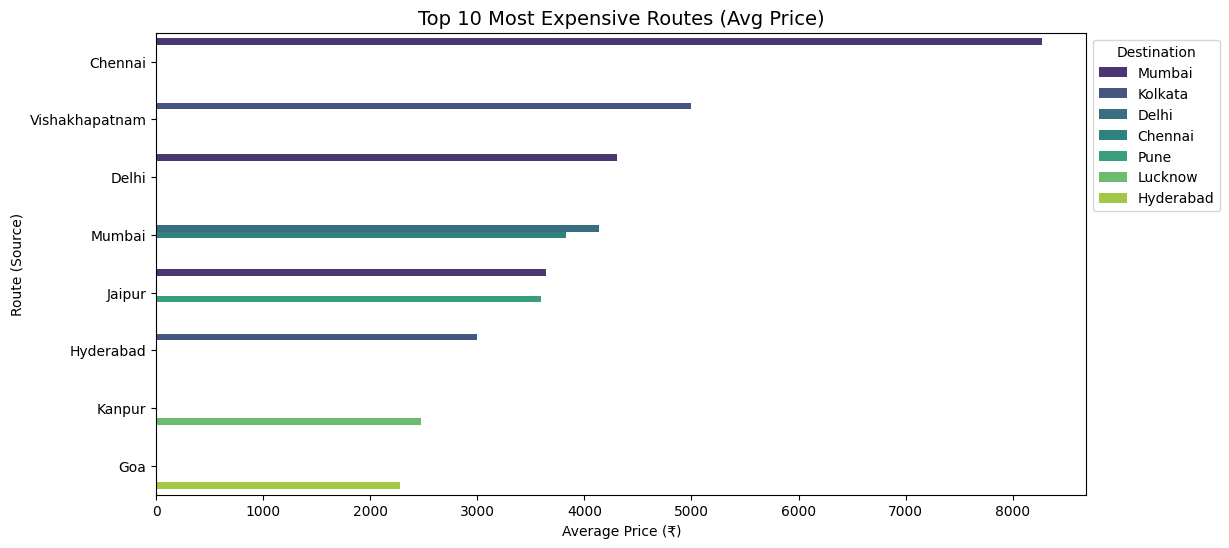

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_routes = avg_price_route.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_routes, x="price", y="Source", hue="Destination", palette="viridis")
plt.title("Top 10 Most Expensive Routes (Avg Price)", fontsize=14)
plt.xlabel("Average Price (₹)")
plt.ylabel("Route (Source)")
plt.legend(title="Destination", bbox_to_anchor=(1,1))
plt.show()

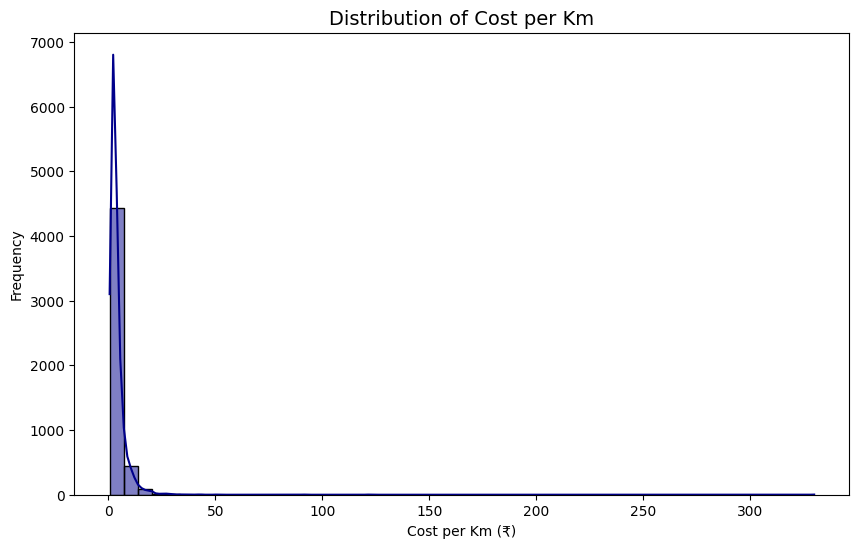

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['cost_per_km'], bins=50, kde=True, color="darkblue")
plt.title("Distribution of Cost per Km", fontsize=14)
plt.xlabel("Cost per Km (₹)")
plt.ylabel("Frequency")
plt.show()

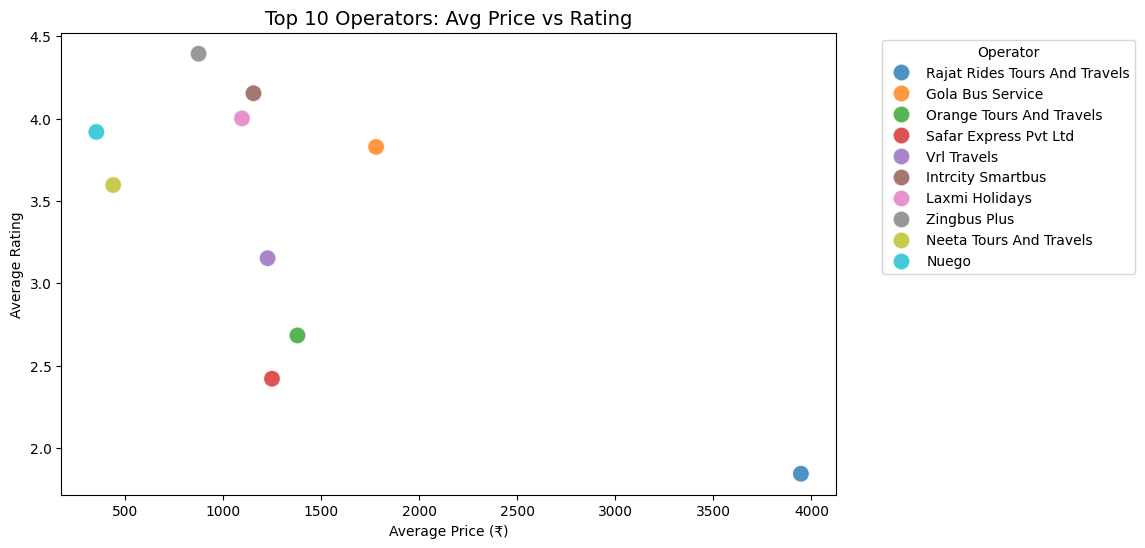

In [ ]:
# pick top 10 operators by count
top_ops = df['Operator'].value_counts().head(10).index
op_stats_top = operator_stats[operator_stats['Operator'].isin(top_ops)]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=op_stats_top,
    x="price",
    y="rating",
    hue="Operator",
    s=150,
    alpha=0.8,
    palette="tab10"
)
plt.title("Top 10 Operators: Avg Price vs Rating", fontsize=14)
plt.xlabel("Average Price (₹)")
plt.ylabel("Average Rating")
plt.legend(title="Operator", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

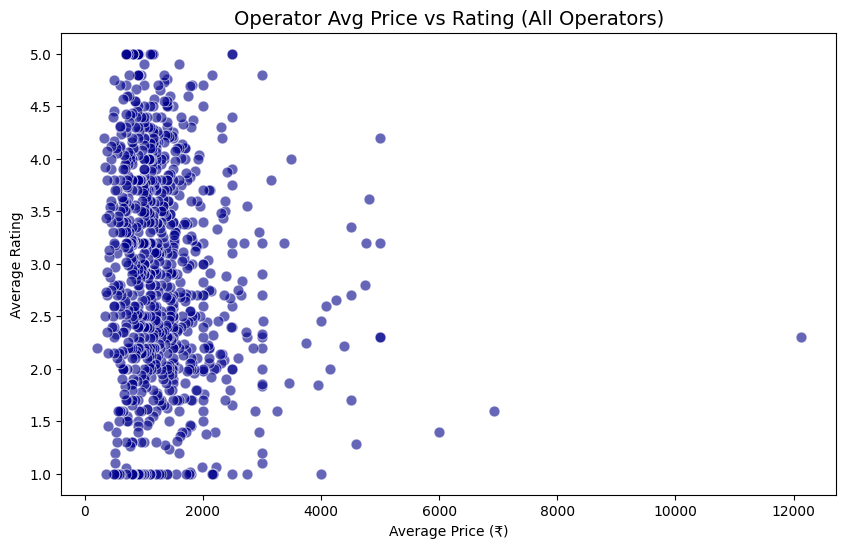

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=operator_stats,
    x="price",
    y="rating",
    color="darkblue",
    s=60,
    alpha=0.6
)
plt.title("Operator Avg Price vs Rating (All Operators)", fontsize=14)
plt.xlabel("Average Price (₹)")
plt.ylabel("Average Rating")
plt.show()

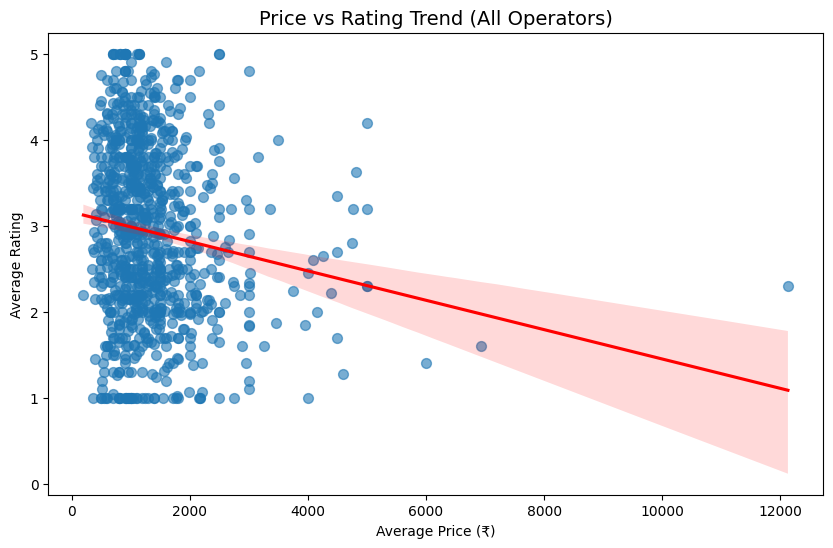

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=operator_stats,
    x="price",
    y="rating",
    scatter_kws={'s':50, 'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title("Price vs Rating Trend (All Operators)", fontsize=14)
plt.xlabel("Average Price (₹)")
plt.ylabel("Average Rating")
plt.show()

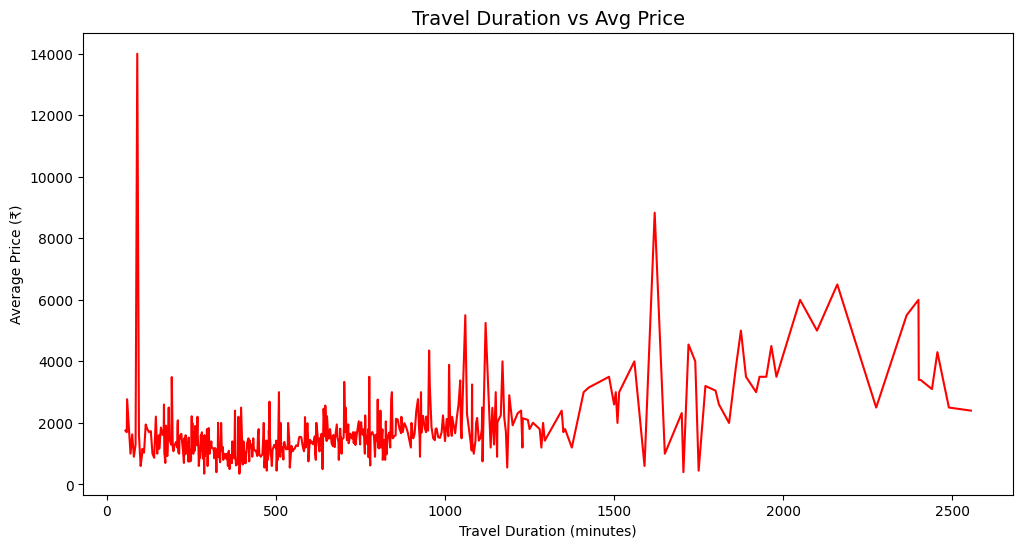

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=duration_price, x="travel_minutes", y="price", color="red")
plt.title("Travel Duration vs Avg Price", fontsize=14)
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Average Price (₹)")
plt.show()